In [ ]:
output <- read.csv("./output.csv")

In [ ]:
install.packages('e1071', dependencies = TRUE)

observations <- factor(output$Actual,
                        levels = c("H", "A", "D"))

predicted <- factor(output$Predicted,
                       levels = c("H", "A", "D"))

conf <- table(predicted, observations)

In [ ]:
install.packages('caret')
library(caret) 
f.conf <- confusionMatrix(conf)

In [ ]:
install.packages('yardstick')
library(yardstick)
library(ggplot2)

Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



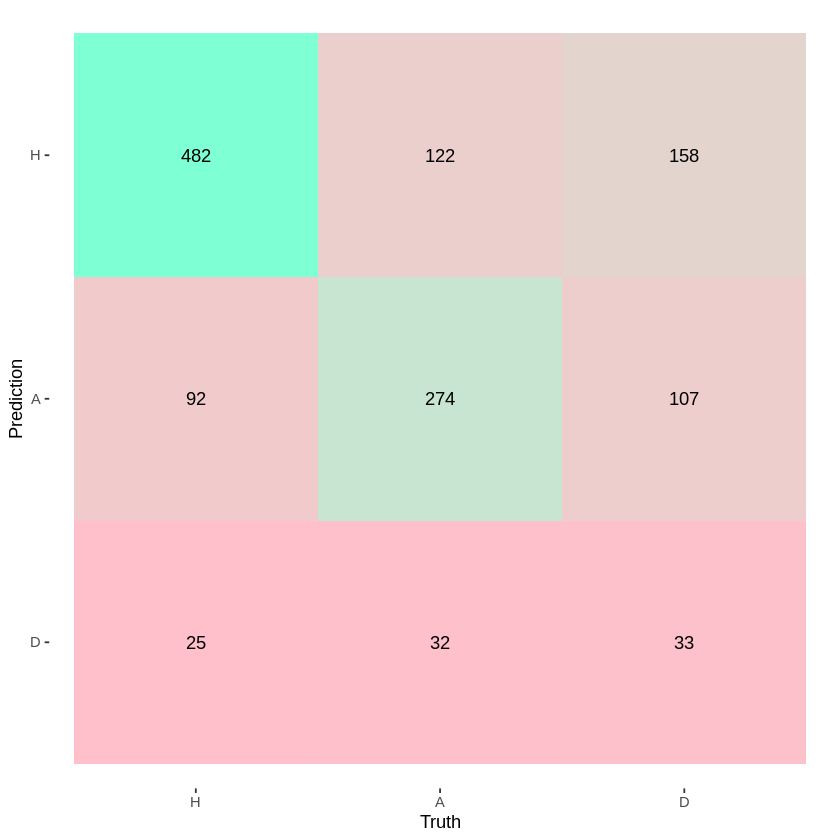

In [14]:
set.seed(123)
mat_conf <- data.frame(
  FTR = sample(0:1,1325, replace = T),
  predicted = sample(0:1,1325, replace = T)
)
mat_conf$FTR <- observations
mat_conf$predicted <- predicted

cm <- conf_mat(mat_conf, FTR, predicted)

# Confusion matrix  to assess the quality of classification on a test set

autoplot(cm, type = "heatmap") +
  scale_fill_gradient(low = "pink", high = "aquamarine1")

In [9]:
print(f.conf)

Confusion Matrix and Statistics

         observations
predicted   H   A   D
        H 482 122 158
        A  92 274 107
        D  25  32  33

Overall Statistics
                                         
               Accuracy : 0.5955         
                 95% CI : (0.5685, 0.622)
    No Information Rate : 0.4521         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.3362         
                                         
 Mcnemar's Test P-Value : < 2.2e-16      

Statistics by Class:

                     Class: H Class: A Class: D
Sensitivity            0.8047   0.6402  0.11074
Specificity            0.6143   0.7781  0.94450
Pos Pred Value         0.6325   0.5793  0.36667
Neg Pred Value         0.7922   0.8192  0.78543
Prevalence             0.4521   0.3230  0.22491
Detection Rate         0.3638   0.2068  0.02491
Detection Prevalence   0.5751   0.3570  0.06792
Balanced Accuracy      0.7095   0.7092  0.52762


It can be concluded that the highest sensitivity was recorded for the home victory (H) level, in his
In this case, 80% of all matches ended with this result were correctly predicted. The lowest sensitivity value is for draws (D) and it is very low. This is due to the fact that it is usually the rarest result in football, and it was also the least frequent in 2010-2020. The model is therefore not sensitive to prediction of draws.


While for this result (D) the specificity value is high - it can be concluded that 94% of all matches in which in fact do not
a draw was observed that was correctly predicted as a result other than a draw.

